<h2>BREAST CANCER PREDICTION</h2>
<h3>Dataset: Wisconsin Dataset</h3>
<h4>Sharat KN</h4>

In [1]:
#importing the essental libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
#loading the Breast cancer data
df_cancer = pd.read_csv("brcaw.csv", index_col=0) #index_col indicates that the 0th column is index and ignore it

# DATA EXPLORATION

In [3]:
print (df_cancer.shape) #Check size

(569, 31)


In [4]:
#to print the first 3 rows of the data
df_cancer.head(3)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,B
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,B
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,B


In [5]:
df_cancer.columns #display the columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [6]:
#Statistical Summary of Numeric Attributes
df_cancer.describe(include='all', percentiles = [0.1,0.25,0.5,0.75,0.95])

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
10%,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,...,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN


In [7]:
#Check for variations in datatypes in feature set
print(df_cancer.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [8]:
#Check for nulll values
df_cancer.isna().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

We observe no null values. We also observe that the feature datatypes are homogeneous. 

# DATA VISUALIZATION

##### Counting number of Malignant and Benign cases we have.

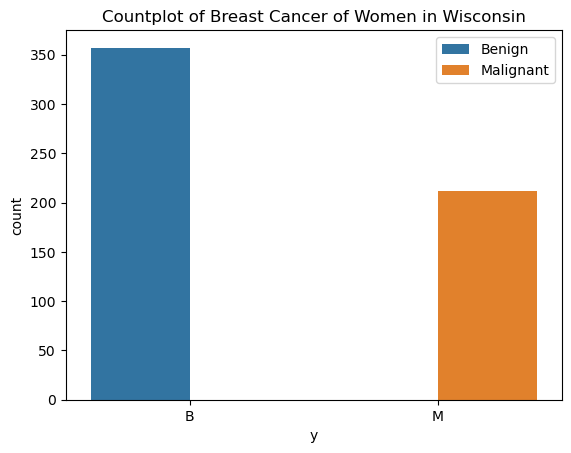

In [9]:

sns.countplot(data=df_cancer, x='y',hue = "y").set_title('Countplot of Breast Cancer of Women in Wisconsin')
plt.legend(labels=['Benign', 'Malignant'])


(M)alignent= 200~ and (B)enign = 350~ approx.

##### We shall now plot relationship between cancer and the mean values of cancer variables using pairplot to understand the variables

C:\Users\045sh\Documents\Fuzz\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


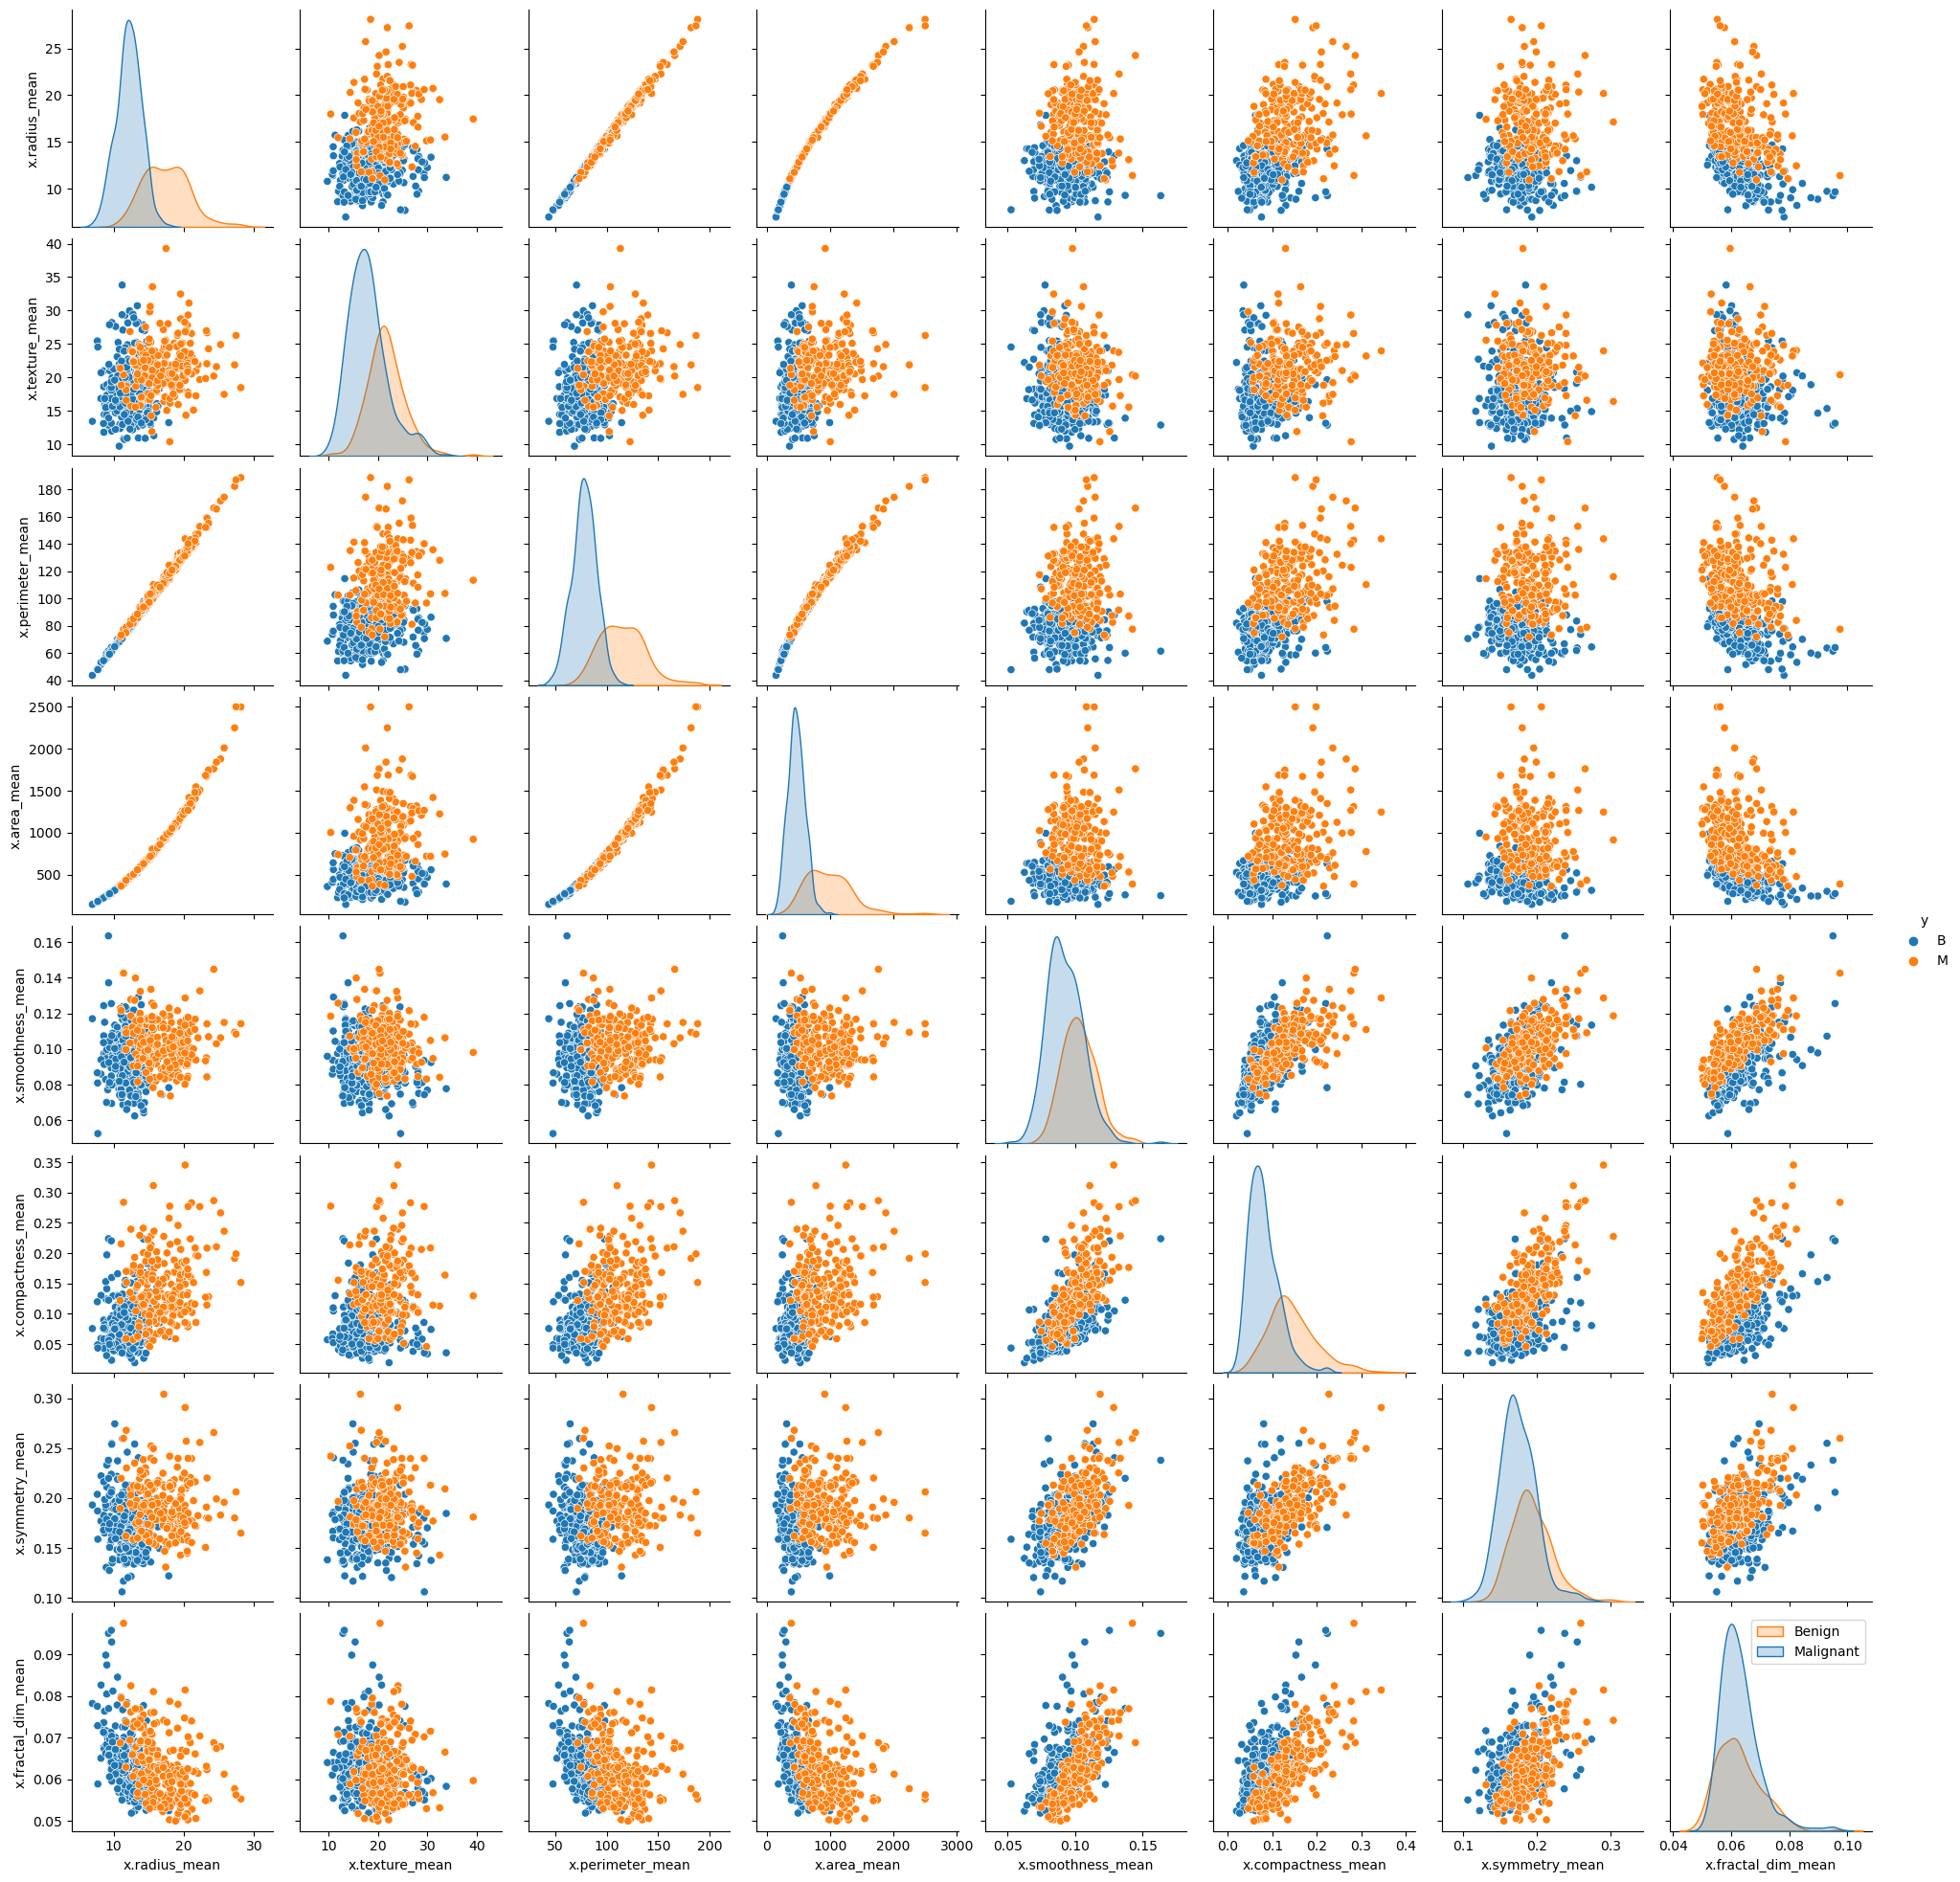

In [10]:
sns.pairplot(df_cancer, hue = 'y', vars = ['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
 'x.smoothness_mean', 'x.compactness_mean','x.symmetry_mean','x.fractal_dim_mean' ])
plt.legend(labels=['Benign', 'Malignant'])

Blue points are malignent case which are severe cases or life threatning cases.
Orange points are not very severe or life threatning

We do observe from the above graphs that the given features have almost clear distinction between benign and malignant tumours

##### We shall now plot relationship between cancer and the mean values of cancer variables using boxplot to understand the difference between spread of data for each features for each type of cancer

Text(0.5, 1.0, 'Boxplot of Mean Concavity')

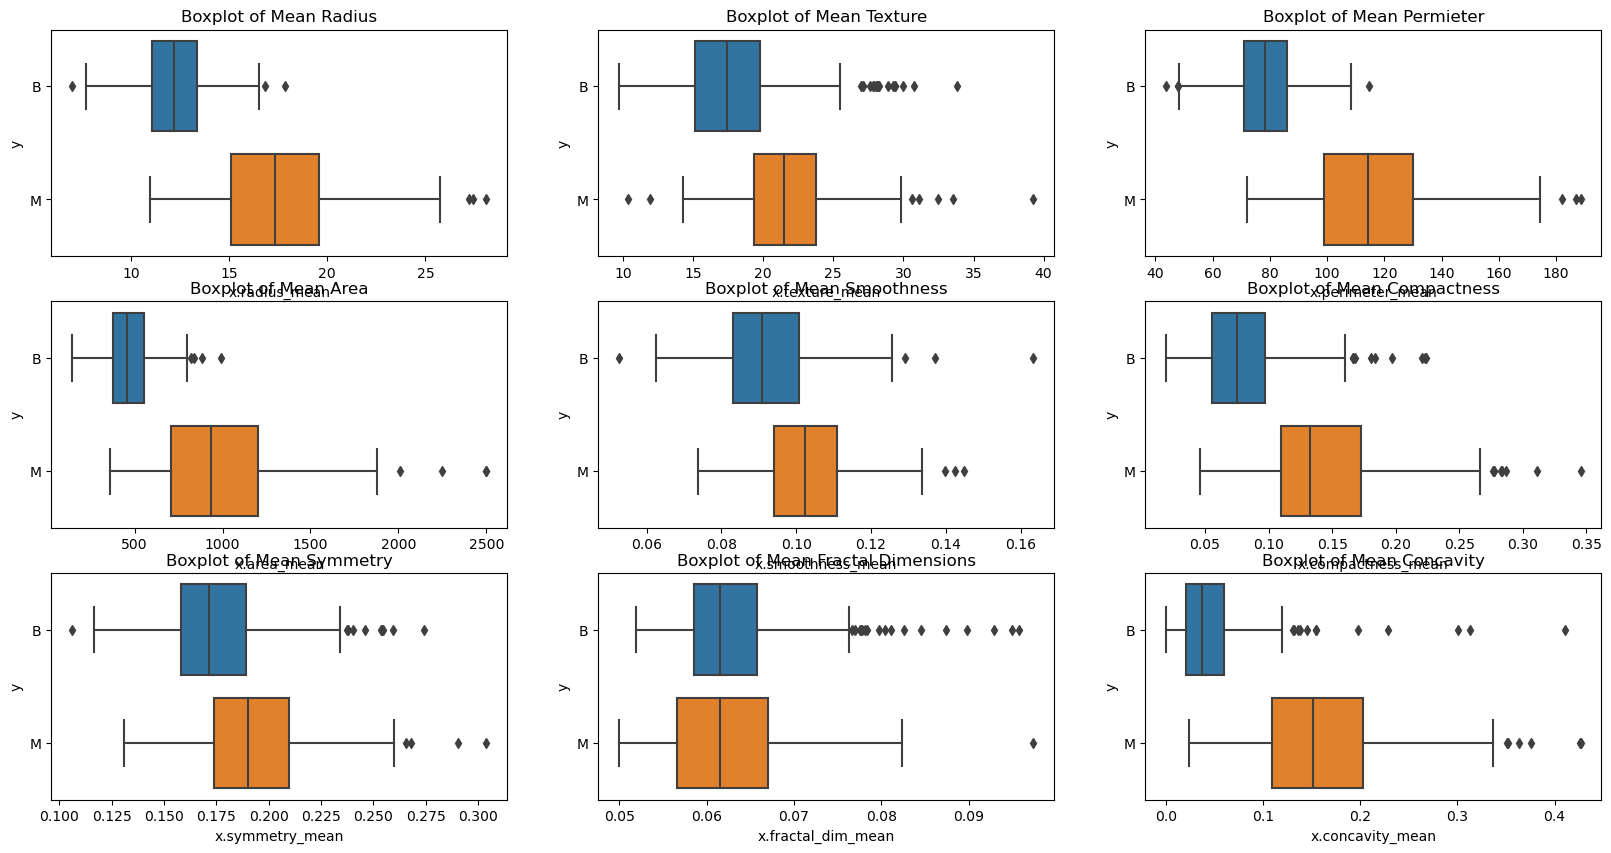

In [11]:
fig, axes =plt.subplots(3,3, figsize=(20,10))
sns.boxplot(data=df_cancer, x=df_cancer['x.radius_mean'],y='y',ax=axes[0,0])
axes[0,0].set_title('Boxplot of Mean Radius')
sns.boxplot(data=df_cancer, x=df_cancer['x.texture_mean'],y='y',ax=axes[0,1])
axes[0,1].set_title('Boxplot of Mean Texture')
sns.boxplot(data=df_cancer, x=df_cancer['x.perimeter_mean'],y='y',ax=axes[0,2])
axes[0,2].set_title('Boxplot of Mean Permieter')
sns.boxplot(data=df_cancer, x=df_cancer['x.area_mean'],y='y',ax=axes[1,0])
axes[1,0].set_title('Boxplot of Mean Area')
sns.boxplot(data=df_cancer, x=df_cancer['x.smoothness_mean'],y='y',ax=axes[1,1])
axes[1,1].set_title('Boxplot of Mean Smoothness')
sns.boxplot(data=df_cancer, x=df_cancer['x.compactness_mean'],y='y',ax=axes[1,2])
axes[1,2].set_title('Boxplot of Mean Compactness')
sns.boxplot(data=df_cancer, x=df_cancer['x.symmetry_mean'],y='y',ax=axes[2,0])
axes[2,0].set_title('Boxplot of Mean Symmetry')
sns.boxplot(data=df_cancer, x=df_cancer['x.fractal_dim_mean'],y='y',ax=axes[2,1])
axes[2,1].set_title('Boxplot of Mean Fractal Dimensions')
sns.boxplot(data=df_cancer, x=df_cancer['x.concavity_mean'],y='y',ax=axes[2,2])
axes[2,2].set_title('Boxplot of Mean Concavity')


Malignant cancer poses higher values of mean for each feature

##### Now we shall plot a heatmap figure of correlation of all the columns to undertand the data better


<Axes: >

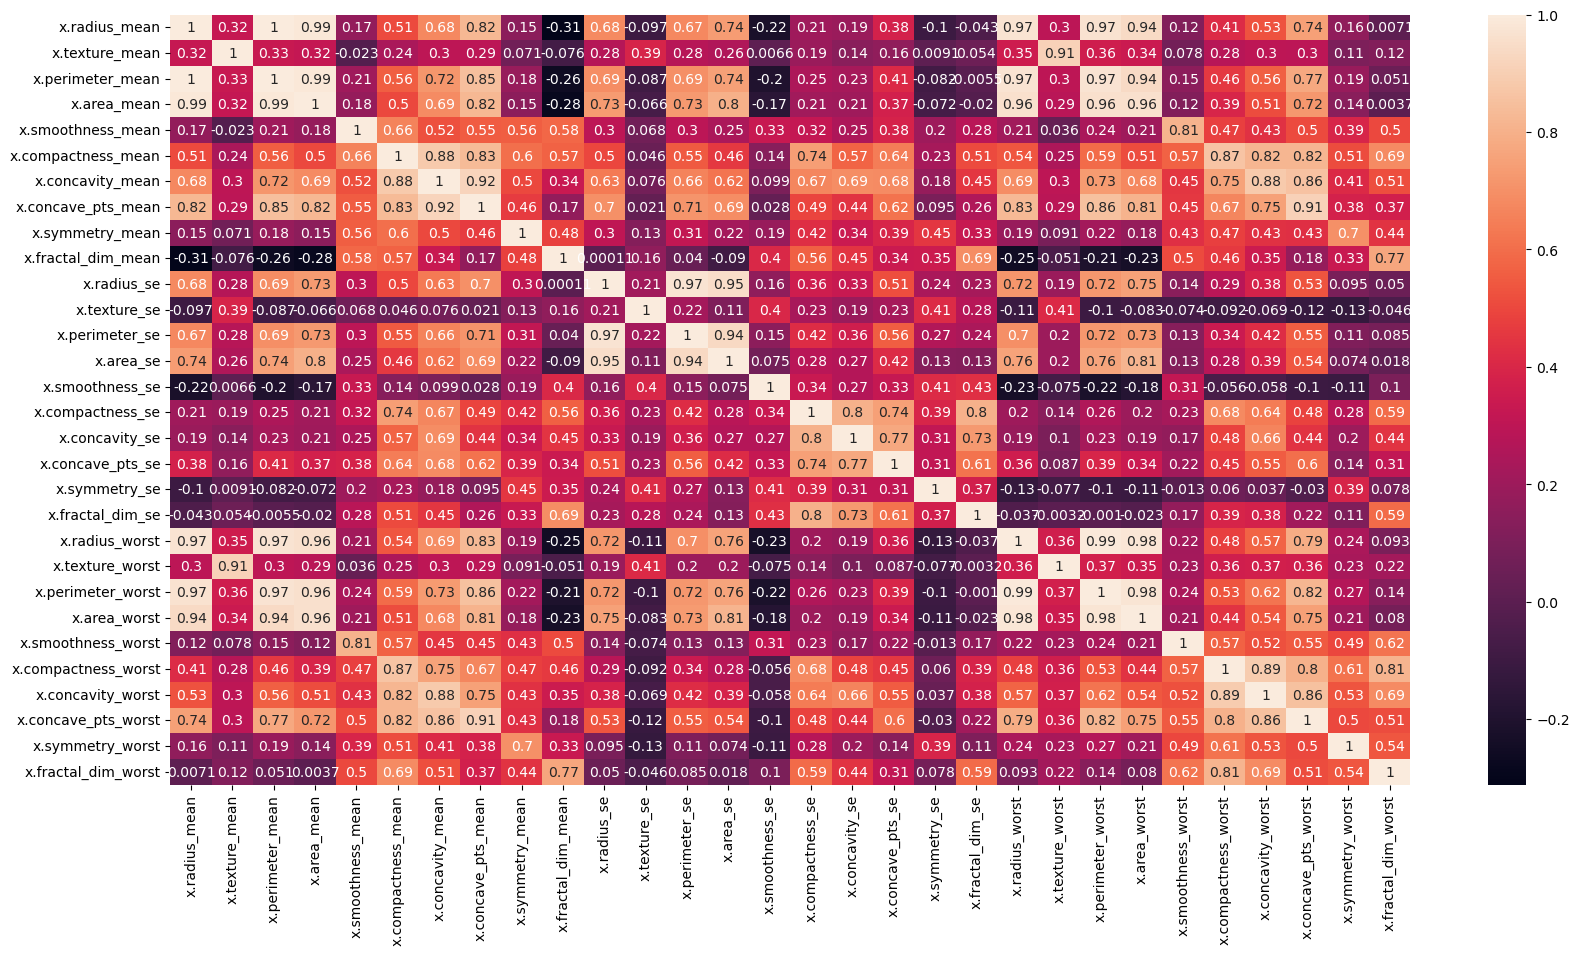

In [12]:
plt.figure(figsize =(20,10))
sns.heatmap(df_cancer.corr(), annot =True)

### In this particular analysis, we are not performing any data preprocessing since the provided dataset appears to be clean and well-structured.

# MODEL BUILDING

#### Splitting Dataset

In [13]:
X = df_cancer.drop(['y'],axis =1)
X

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [14]:
y= df_cancer['y']
y

1      B
2      B
3      B
4      B
5      B
      ..
565    M
566    M
567    M
568    M
569    M
Name: y, Length: 569, dtype: object

#### Train test split

In [15]:
#TEST SET 1
#Train = 80 % Test = 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
#TEST SET 2
# We are asked to split the dataset with different ratios of your choice. So will take test data 10% Train = 90%
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=5)

## Using KNeighborsClassifier Method

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that classifies data points based on the majority class of their nearest neighbors in a feature space.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### KNN Classifier For Test Set 1

This code creates a k-nearest neighbors (KNN) classification model with 4 neighbors, using the Minkowski distance metric with p=2 (Euclidean distance). It then trains the model on the training data X_train and their corresponding labels y_train.

In [18]:
knn_model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Making prediction

In [19]:
y_predict =knn_model.predict(X_test.values)
y_predict

C:\Users\045sh\Documents\Fuzz\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

#### CREATING A CONFUSION MATRIX

In [20]:
cm = confusion_matrix(y_test,y_predict)

#### PLOTTING A HEATMAP OF CONFUSION MATRIX FOR BETTER VISUALIZATION

<Axes: >

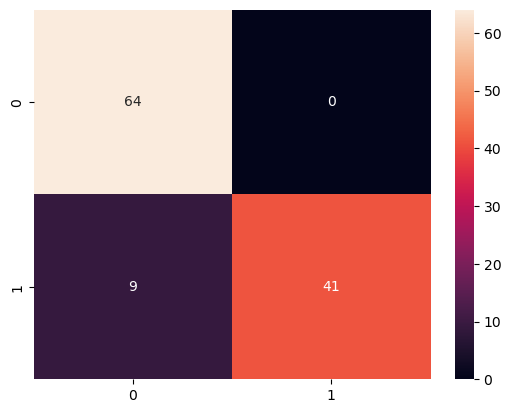

In [21]:
sns.heatmap(cm ,annot=True)

#### PERFORMANCE EVALUATION

In [22]:
#Print Classification Report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           B       0.88      1.00      0.93        64
           M       1.00      0.82      0.90        50

    accuracy                           0.92       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



In [23]:
#Calculate Metrics
average_f1 = metrics.f1_score(y_test, y_predict, average='weighted')

accuracy = metrics.accuracy_score(y_test, y_predict)
print("Average F1 Score is", average_f1, "and accuracy is ",accuracy)

Average F1 Score is 0.9197418025693094 and accuracy is  0.9210526315789473


#### FINDING OPTIMAL VALUE OF 'k' USING HYPERPARAMETER TUNING

Following code performs k-nearest neighbors (KNN) classification with varying values of 'k' (from 1 to 9) and evaluates the model's accuracy. It stores the mean accuracy and standard deviation of accuracy for each 'k' value in the 'mean_acc' and 'std_acc' arrays. Finally, it returns the 'mean_acc' array containing the accuracy scores for different 'k' values.

In [24]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train.values,y_train)
    yhat=neigh.predict(X_test.values)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.89473684, 0.90350877, 0.93859649, 0.92105263, 0.94736842,
       0.94736842, 0.94736842, 0.92105263, 0.94736842])

#### Now, we plot the graph of accuracy vs number of ks

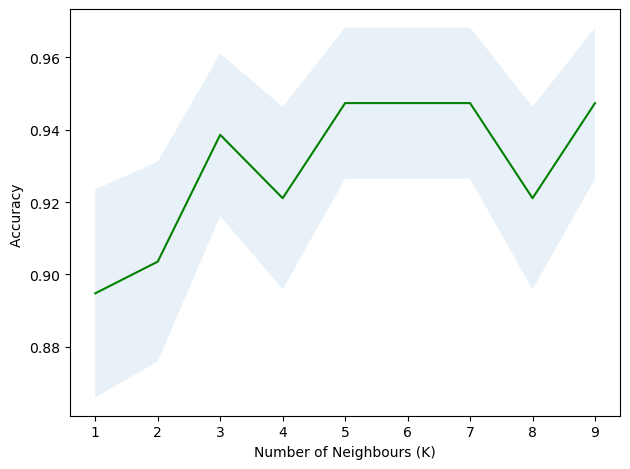

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9473684210526315 with k= 5


#### So the best value for test set 1 is k= 5

#### Now that we have the value of k, we can try to improve the accuracy for our model

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_predict =knn_model.predict(X_test.values)
y_predict

C:\Users\045sh\Documents\Fuzz\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

#### Confusion Matrix and Heatmap for Optimal Value of k (5)

<Axes: >

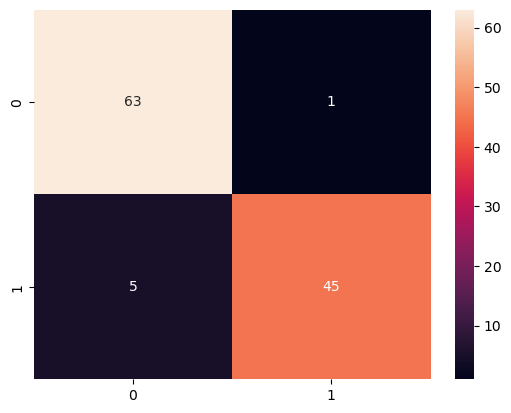

In [29]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm ,annot=True)

#### PERFORMANCE EVALUATION  FOR OPTIMAL VALUE OF K (5)

In [30]:
#Print Classification Report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           B       0.93      0.98      0.95        64
           M       0.98      0.90      0.94        50

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [31]:
#Calculate Metrics
f1_knn_testset_1 = metrics.f1_score(y_test, y_predict, average='weighted')
acc_knn_testset_1 = metrics.accuracy_score(y_test, y_predict)
print("Average F1 Score:", f1_knn_testset_1, "and Accuracy is ",acc_knn_testset_1)

Average F1 Score: 0.9470693779904307 and Accuracy is  0.9473684210526315


#### Accuracy is around 95%

### As we can see the Test set accuracy for the model has increased from 92% (k=4) to 95% when taken the best value for nearest neighbours (k=5)

### KNN Classifier for Test Set 2

#### NOW WE WILL TUNE HYPERPARAMETER FOR TEST SET 2

In [32]:
mean_acc1 = np.zeros((Ks-1))
std_acc1 = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train1.values,y_train1)
    yhat1=neigh.predict(X_test1.values)
    mean_acc1[n-1] = metrics.accuracy_score(y_test1, yhat1)

    
    std_acc1[n-1]=np.std(yhat1==y_test1)/np.sqrt(yhat1.shape[0])

mean_acc1

array([0.87719298, 0.87719298, 0.9122807 , 0.87719298, 0.9122807 ,
       0.89473684, 0.9122807 , 0.9122807 , 0.92982456])

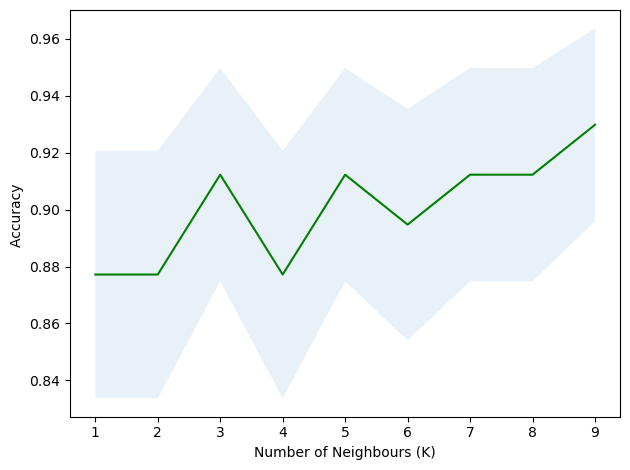

In [33]:
plt.plot(range(1,Ks),mean_acc1,'g')
plt.fill_between(range(1,Ks),mean_acc1 - 1 * std_acc1,mean_acc1 + 1 * std_acc1, alpha=0.10)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", mean_acc1.max(), "with k=", mean_acc1.argmax()+1) 

The best accuracy was with 0.9298245614035088 with k= 9


#### So the best value for test set 2 is k= 9. We shall apply KNN Classifier for Test Set 2 with k=9

In [35]:
knn_model = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn_model.fit(X_train1, y_train1)
y_predict1 =knn_model.predict(X_test1.values)
y_predict1

C:\Users\045sh\Documents\Fuzz\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'M'], dtype=object)

<Axes: >

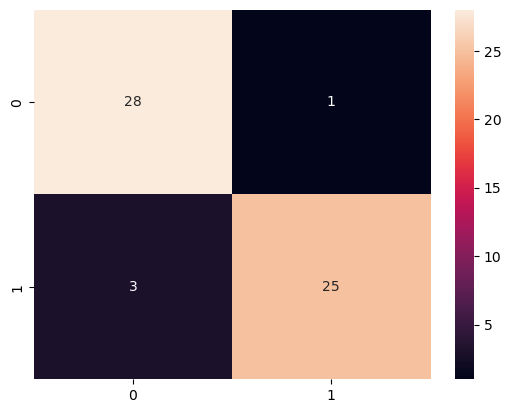

In [36]:
cm = confusion_matrix(y_test1,y_predict1)
sns.heatmap(cm ,annot=True)

In [37]:
#Print Classification Report
print(classification_report(y_test1,y_predict1))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93        29
           M       0.96      0.89      0.93        28

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



In [38]:
#Calculate Metrics
f1_knn_testset_2 = metrics.f1_score(y_test1, y_predict1, average='weighted')
acc_knn_testset_2 = metrics.accuracy_score(y_test, y_predict)
print("Average F1 Score:", f1_knn_testset_2, "and Accuracy is ",acc_knn_testset_2)

Average F1 Score: 0.9296946068875893 and Accuracy is  0.9473684210526315


### The Accuracy of the model for Test Set 2 is 94%  

## Random Forest Classifier

Random forests are an ensemble learning method that combines predictions from multiple decision trees to improve classification accuracy and robustness, making it suitable for various machine learning tasks.

In [39]:
from sklearn.ensemble import RandomForestClassifier

Now we initialize a random forest classifier named clf with 50 decision trees (estimators).

In [40]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=50)

##### RANDOM FOREST CLASSIFIER TEST SET 1

In [41]:
#Train the model using the training set 1 i.e Test Data = 20%
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [42]:
# prediction on test set
y_pred_RF=clf.predict(X_test)

#### CONFUSION MATRIX AND CORRESPONDING HEATMAP OF MODEL FOR TEST SET 1

In [43]:
cmrf = confusion_matrix(y_test,y_pred_RF)

<Axes: >

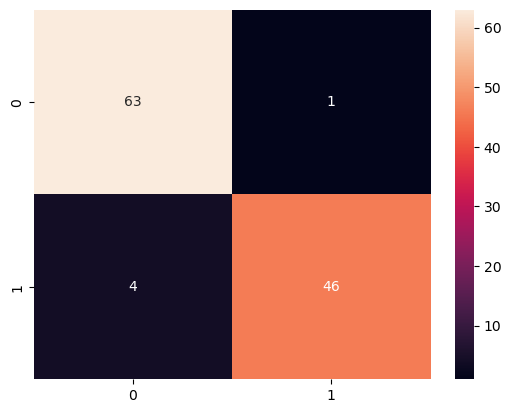

In [44]:
sns.heatmap(cmrf,annot=True)

#### PERFORMANCE EVALUATION OF MODEL FOR TEST SET 1

In [45]:
#Print Classification Report
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96        64
           M       0.98      0.92      0.95        50

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [46]:
#Calculate Metrics
f1_rf_testset_1 = metrics.f1_score(y_test, y_pred_RF, average='weighted')
acc_rf_testset_1 = metrics.accuracy_score(y_test, y_pred_RF)
print("Average F1 Score:", f1_rf_testset_1, "and Accuracy is ",acc_rf_testset_1)

Average F1 Score: 0.9559643186032288 and Accuracy is  0.956140350877193


##### RANDOM FOREST CLASSIFIER FOR TEST SET 2

In [47]:
#Train the model using the training set 1 i.e Test Data = 20%
clf.fit(X_train1,y_train1)
# prediction on test set
y_pred_RF=clf.predict(X_test1)

#### CONFUSION MATRIX AND HEATMAP OF MODEL FOR TEST SET 2

<Axes: >

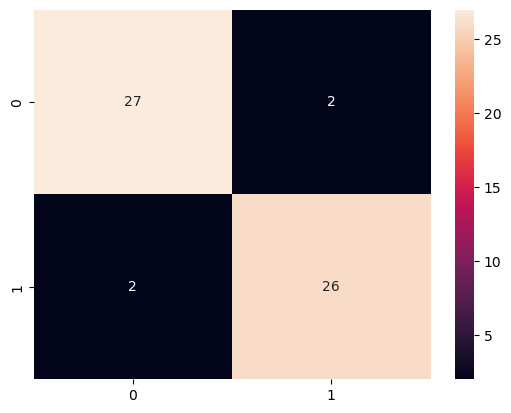

In [48]:
cmrf = confusion_matrix(y_test1,y_pred_RF)
sns.heatmap(cmrf,annot=True)

#### PERFORMANCE EVALUATION OF MODEL FOR TEST SET 2

In [49]:
#Print Classification Report
print(classification_report(y_test1,y_pred_RF))

              precision    recall  f1-score   support

           B       0.93      0.93      0.93        29
           M       0.93      0.93      0.93        28

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



In [50]:
#Calculate metrics
f1_rf_testset_2 = metrics.f1_score(y_test1, y_pred_RF, average='weighted')
acc_rf_testset_2 = metrics.accuracy_score(y_test1, y_pred_RF)
print("Average F1 Score:", f1_rf_testset_2,"and Accuracy is ",acc_rf_testset_2)

Average F1 Score: 0.9298245614035088 and Accuracy is  0.9298245614035088


## PERFORMANCE COMPARISON

#### F1 SCORE

In [51]:
df_f1 = pd.DataFrame(columns=['MODEL','Test Set 1','Test Set 2'])
df_f1['MODEL'] = ('KNN', 'Random Forest')
df_f1['Test Set 1'] = (f1_knn_testset_1, f1_rf_testset_1)
df_f1['Test Set 2'] = (f1_knn_testset_2, f1_rf_testset_2)
print("F1 SCORE")
df_f1

F1 SCORE


,MODEL,Test Set 1,Test Set 2
0,KNN,0.947069,0.929695
1,Random Forest,0.955964,0.929825


#### ACCURACY

In [52]:
df_acc = pd.DataFrame(columns=['MODEL','Test Set 1','Test Set 2'])
df_acc['MODEL'] = ('KNN', 'Random Forest')
df_acc['Test Set 1'] = (acc_knn_testset_1, acc_rf_testset_1)
df_acc['Test Set 2'] = (acc_knn_testset_2, acc_rf_testset_2)
print("ACCURACY SCORE")
df_acc

ACCURACY SCORE


,MODEL,Test Set 1,Test Set 2
0,KNN,0.947368,0.947368
1,Random Forest,0.956140,0.929825


# OBSERVATIONS

### For both classifiers Test Set 1 seem to perform much better than Test Set 2.

### The Random Forest model with an F1 score of 0.96 and accuracy of 0.96 performs slightly better than the K-Nearest Neighbors (KNN) model with an F1 score of 0.94 and accuracy of 0.95.
### However, Random Forest is an ensemble method that combines multiple decision trees, which tend to be more robust and less prone to overfitting compared to a single KNN model. KNN can be sensitive to the choice of neighbors (k) and may overfit or underfit if not tuned correctly.
### Random Forest can also capture complex, non-linear relationships in the data due to its tree-based structure.